# **1. Perkenalan Dataset**

**Sumber Dataset**:  
   Dataset diperoleh dari kaggle: https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?select=segmentation+data.csv
   
**Dataset**:
   - **Tanpa label**: Dataset tidak memiliki label atau kelas.
   - **Jumlah Baris**: Dataset memiliki 2000 baris.
   - **Jumlah Kolom**: Dataset memiliki 8 kolom.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*:
        - Sex (Jenis Kelamin)
        - Marital status (Status Pernikahan)
        - Education (Tingkat Pendidikan)
        - Occupation (Tingkat Pekerjaan)
        - Settlement size (Ukuran Tempat Tinggal)
     - *Numerikal*:
        - Age (Usia)
        - Income (Pendapatan)

**Penjelasan Semua Kolom Dataset**:  
  - ID: Identifikasi unik untuk setiap individu dalam dataset.
  - Sex: Jenis kelamin individu (0 = Perempuan, 1 = Laki-laki).
  - Marital status: Status pernikahan (0 = Belum menikah, 1 = Menikah).
  - Age: Usia individu dalam tahun.
  - Education: Tingkat pendidikan individu (0 = Rendah, 1 = Menengah, 2 = Tinggi).
  - Income: Pendapatan individu dalam satuan mata uang tertentu.
  - Occupation: Tingkat pekerjaan individu (0 = Tidak bekerja, 1 = Pekerjaan menengah, 2 = Pekerjaan tinggi).
  - Settlement size: Ukuran tempat tinggal individu (0 = Pedesaan, 1 = Kota kecil, 2 = Kota besar).

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# **3. Memuat Data**

In [2]:
df = pd.read_csv('Dataset_Clustering.csv')

# **4. Exploratory Data Analysis (EDA)**

In [3]:
# jumlah baris dan kolom dataset
df.shape

(2000, 8)

In [4]:
# menampilkan sebagian data
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [5]:
# informasi jenis tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [6]:
# mengecek nilai duplikat
df.duplicated().sum()

np.int64(0)

In [7]:
# mengecek missing value
df.isnull().sum()

,0
ID,0
Sex,0
Marital status,0
Age,0
Education,0
Income,0
Occupation,0
Settlement size,0


In [8]:
# unique value
df.nunique()

,0
ID,2000
Sex,2
Marital status,2
Age,58
Education,4
Income,1982
Occupation,3
Settlement size,3


In [9]:
numerical= ["Age","Income"]
categorical= ["Sex","Marital status","Education","Occupation","Settlement size"]

df_numerical = df[numerical]
df_categorical = df[categorical]

In [10]:
# unique value kolom 'Age'
print(df['Age'].value_counts())

Age
26    116
27    111
25     88
24     83
28     80
35     79
23     77
31     76
36     73
30     70
29     70
32     67
33     66
34     60
40     58
37     56
38     51
22     49
42     48
39     40
46     35
21     34
43     33
41     33
45     31
44     30
49     29
48     29
47     26
20     23
50     23
57     20
51     19
52     19
54     17
53     16
63     15
64     14
61     13
60     13
65     12
58     12
67     10
56     10
55     10
66      9
62      8
68      7
19      5
59      5
71      5
74      4
73      3
70      3
18      3
75      2
76      1
72      1
Name: count, dtype: int64


In [11]:
# statistik deskriptif kolom Age
df.Age.describe()

,Age
count,2000.000000
mean,35.909000
std,11.719402
min,18.000000
25%,27.000000
50%,33.000000
75%,42.000000
max,76.000000


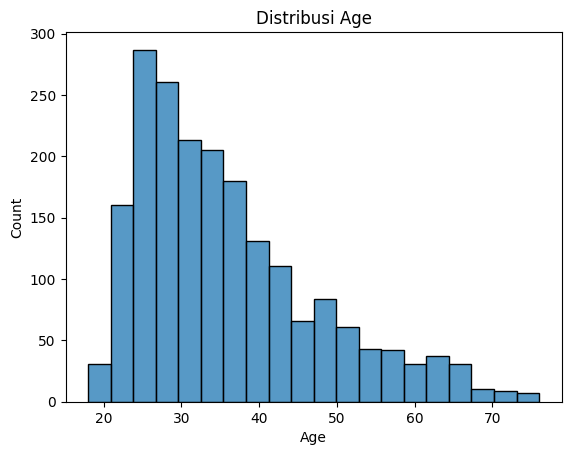

In [12]:
# Histogram kolom 'Age'
sns.histplot(df['Age'], bins=20, edgecolor='black')

plt.title('Distribusi Age')

plt.show()

In [13]:
# unique value kolom 'Income'
print(df['Income'].value_counts())

Income
214364    2
120262    2
171052    2
131242    2
170113    2
         ..
111862    1
162772    1
138952    1
187647    1
223018    1
Name: count, Length: 1982, dtype: int64


In [14]:
# statistik deskriptif kolom income
df.Income.describe()

,Income
count,2000.000000
mean,120954.419000
std,38108.824679
min,35832.000000
25%,97663.250000
50%,115548.500000
75%,138072.250000
max,309364.000000


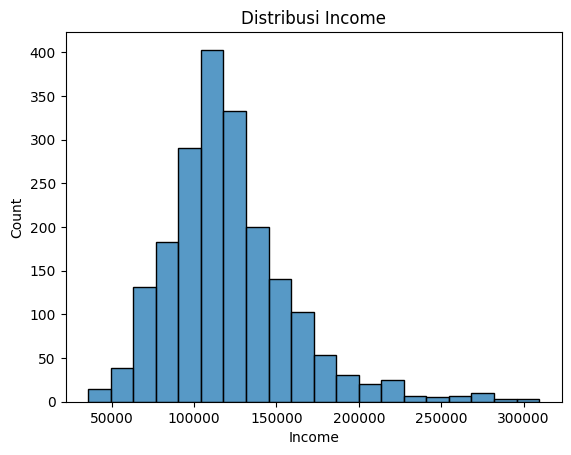

In [15]:
# Histogram kolom 'Income'
sns.histplot(df['Income'], bins=20, edgecolor='black')

plt.title('Distribusi Income')

plt.show()

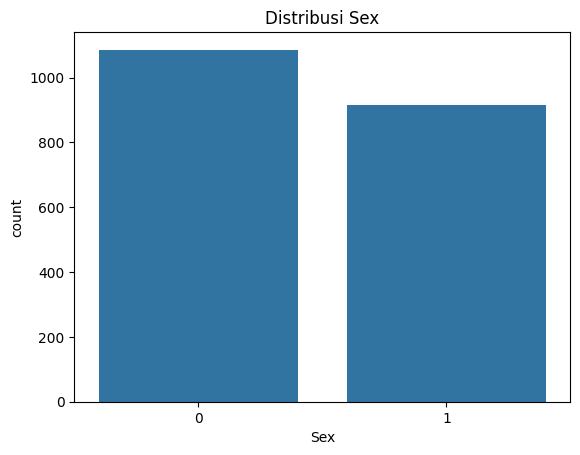

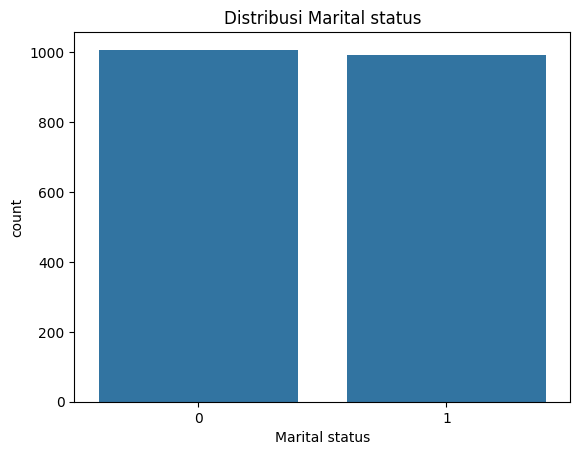

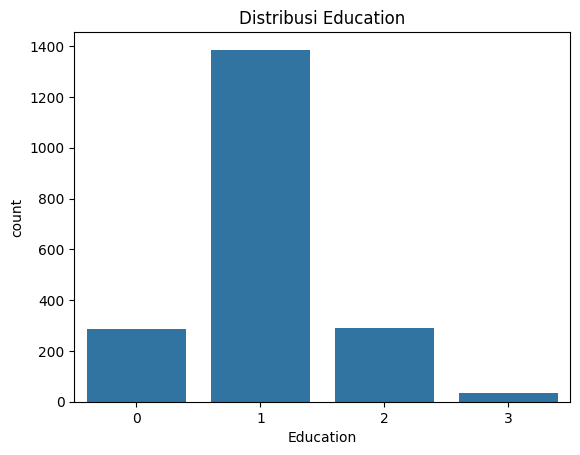

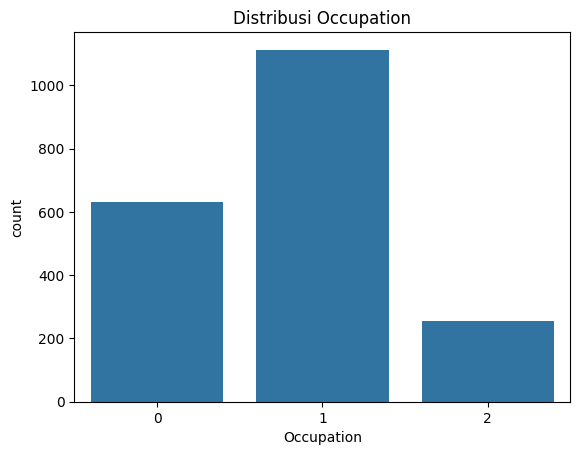

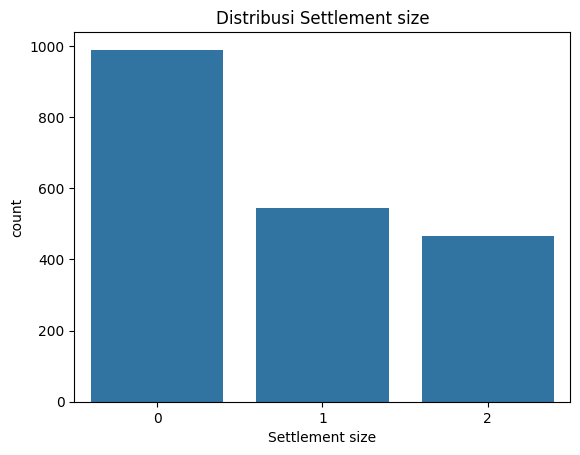

In [16]:
# Histogram kolom categorical
for col in categorical:
    sns.countplot(data=df, x=col)

    plt.title(f'Distribusi {col}')

    plt.show()


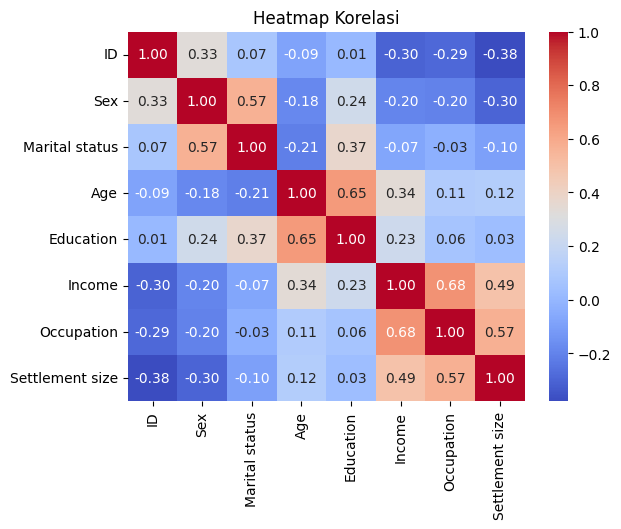

In [17]:
# heatmap korelasi antar variabel
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Heatmap Korelasi")

plt.show()

In [18]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


# **5. Data Preprocessing**

In [19]:
# menghapus kolom 'ID' karena tidak diperlukan
df.drop(['ID'], inplace=True, axis=1)

In [20]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [21]:
# deteksi outlier dengan z-score
df_outlier = df.copy()

z_scores = np.abs(stats.zscore(df_outlier[numerical]))

# deteksi outlier (z_scores > 3)
outliers_zscore = (z_scores > 3).sum(axis=0)
outliers_zscore

,0
Age,11
Income,31


In [22]:
# # filter outlier (z-score ≤ 3)
df_no_outliers = df_outlier[(z_scores < 3).all(axis=1)].reset_index(drop=True)

In [23]:
# # jumlah data sebelum dan sesudah menghapus outlier
print(f"Jumlah data sebelum menghapus outlier: {df_outlier.shape[0]}")
print(f"Jumlah data setelah menghapus outlier: {df_no_outliers.shape[0]}")

Jumlah data sebelum menghapus outlier: 2000
Jumlah data setelah menghapus outlier: 1958


In [24]:
df_no_outliers

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1953,1,0,47,1,123525,0,0
1954,1,1,27,1,117744,1,0
1955,0,0,31,0,86400,0,0
1956,1,1,24,1,97968,0,0


In [25]:
# standarisasi data
df_standardized = df_no_outliers.copy()

scaler = MinMaxScaler()
df_scaler = scaler.fit_transform(df_standardized)

In [26]:
df_scaler

array([[0.        , 0.        , 0.9245283 , ..., 0.4528854 , 0.5       ,
        1.        ],
       [1.        , 1.        , 0.0754717 , ..., 0.58595534, 0.5       ,
        1.        ],
       [0.        , 0.        , 0.58490566, ..., 0.2721146 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.24528302, ..., 0.25778956, 0.        ,
        0.        ],
       [1.        , 1.        , 0.11320755, ..., 0.31676183, 0.        ,
        0.        ],
       [0.        , 0.        , 0.13207547, ..., 0.1661093 , 0.        ,
        0.        ]])

# **6. Pembangunan Model Clustering**

## **a. Pembangunann Model Clustering**

In [27]:
# pembangunan model kmeans
cluster_range = range(2, 11)  # jumlah cluster yang diuji
kmeans_models = {}

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=50, max_iter=300, random_state=42)
    kmeans.fit(df_scaler)
    kmeans_models[k] = kmeans

## **b. Evaluasi Model Clustering**

In [28]:
# evaluasi model menggunakan Silhouette Score
best_k = None
best_score = -1

sil_scores = []

for k, kmeans in kmeans_models.items():
    labels = kmeans.predict(df_scaler)
    score = silhouette_score(df_scaler, labels)
    print(f"K={k}, Silhouette Score: {score}")
    sil_scores.append(score)

    if score > best_score:
        best_k = k
        best_score = score

K=2, Silhouette Score: 0.3858527730324394
K=3, Silhouette Score: 0.3517311328578138
K=4, Silhouette Score: 0.39628354124959486
K=5, Silhouette Score: 0.41616936373767777
K=6, Silhouette Score: 0.4268665270030236
K=7, Silhouette Score: 0.4337348271704917
K=8, Silhouette Score: 0.408456556223725
K=9, Silhouette Score: 0.39590246073351115
K=10, Silhouette Score: 0.4170434385172203


In [29]:
print(f"Best K={best_k}, Best Silhouette Score: {best_score}")

Best K=7, Best Silhouette Score: 0.4337348271704917


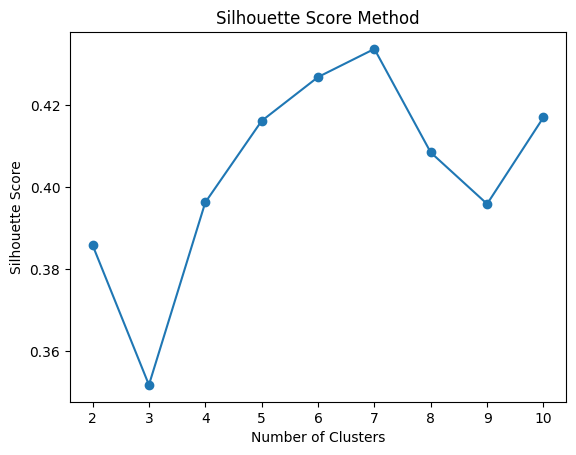

In [30]:
# visualisasi silhouette score
plt.plot(cluster_range, sil_scores, marker="o", linestyle="-")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Method")
plt.show()

## **c. Feature Selection (Opsional)**

In [31]:
# reduksi dimensi dengan PCA (3 komponen utama)
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaler)

In [32]:
# pembangunan model setelah pca
cluster_range = range(2, 11)  # jumlah cluster yang diuji
kmeans_models = {}

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=50, max_iter=300, random_state=42)
    kmeans.fit(df_pca)
    kmeans_models[k] = kmeans

In [33]:
# evaluasi model menggunakan Silhouette Score
best_k = None
best_score = -1

sil_scores = []

for k, kmeans in kmeans_models.items():
    labels = kmeans.predict(df_pca)
    score = silhouette_score(df_pca, labels)
    print(f"K={k}, Silhouette Score: {score}")
    sil_scores.append(score)

    if score > best_score:
        best_k = k
        best_score = score

K=2, Silhouette Score: 0.481119642675028
K=3, Silhouette Score: 0.4786702759706582
K=4, Silhouette Score: 0.5595455671367003
K=5, Silhouette Score: 0.6217328178950648
K=6, Silhouette Score: 0.6735438682076186
K=7, Silhouette Score: 0.6952276558033187
K=8, Silhouette Score: 0.6965222144726448
K=9, Silhouette Score: 0.6980013625843865
K=10, Silhouette Score: 0.734563966081904


In [34]:
print(f"K={best_k}, Best Silhouette Score: {best_score}")

K=10, Best Silhouette Score: 0.734563966081904


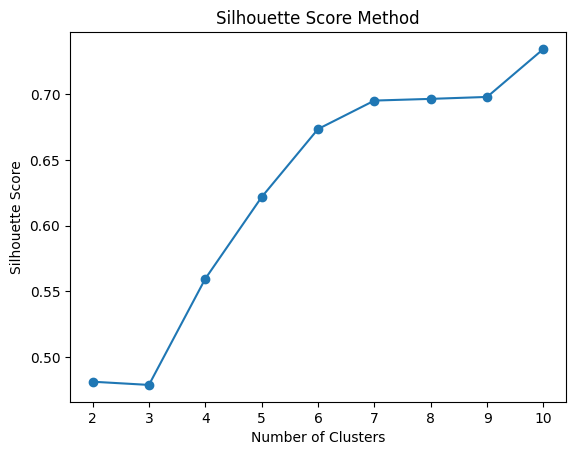

In [35]:
# visualisasi silhouette score
plt.plot(cluster_range, sil_scores, marker="o", linestyle="-")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Method")
plt.show()

### Perbandingan setelah dilakukan PCA

  - Peningkatan Silhouette Score:
    Setelah PCA, silhouette score meningkat secara signifikan, menunjukkan bahwa cluster lebih terpisah dengan baik.

  - Perubahan Best K:
    Sebelum PCA, best K = 7, tetapi setelah PCA, best K berubah menjadi 10. Ini menunjukkan bahwa PCA membantu memperjelas struktur dalam data, sehingga jumlah cluster optimal meningkat.

  - Grafik Silhouette Score:
    
    Sebelum PCA, nilai silhouette score naik-turun, menunjukkan kemungkinan adanya noise atau fitur yang tidak relevan.

    Setelah PCA, silhouette score meningkat secara konsisten, yang menandakan clustering menjadi lebih stabil dan lebih baik.

In [36]:
# terapkan K-Means dengan jumlah cluster terbaik
final_kmeans = KMeans(n_clusters=best_k, init="k-means++", n_init=50, max_iter=300, random_state=42)
cluster_labels = final_kmeans.fit_predict(df_pca)

## **d. Visualisasi Hasil Clustering**

In [37]:
# visualisasi cluster pca 3d
df_plot = pd.DataFrame(df_pca, columns=["PCA 1", "PCA 2", "PCA 3"])

df_plot["Cluster"] = cluster_labels.astype(str)

fig = px.scatter_3d(df_plot, x="PCA 1", y="PCA 2", z="PCA 3",
                      color="Cluster", opacity=0.7,
                      color_discrete_sequence=px.colors.qualitative.Bold)

# legend
fig.update_layout(
    title="Visualisasi Cluster PCA 3D",
    legend_title_text="Cluster",
    legend=dict(
        x=1,
        y=1,
        bgcolor="rgba(255,255,255,0.5)",
        bordercolor="black",
        borderwidth=1
    )
)

fig.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

In [38]:
# tambahkan label clusterr ke dataset yang telah distandarisasi
df_standardized = pd.DataFrame(df_scaler, columns=df.columns)
df_standardized["Cluster"] = cluster_labels

In [39]:
# inverse data
df = pd.DataFrame(scaler.inverse_transform(df_standardized.drop(columns=["Cluster"])), columns=df.columns)
df["Cluster"] = df_standardized["Cluster"]

In [40]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,0.0,0.0,67.0,2.0,124670.0,1.0,2.0,0
1,1.0,1.0,22.0,1.0,150773.0,1.0,2.0,8
2,0.0,0.0,49.0,1.0,89210.0,0.0,0.0,3
3,0.0,0.0,45.0,1.0,171565.0,1.0,1.0,7
4,0.0,0.0,53.0,1.0,149031.0,1.0,1.0,7
...,...,...,...,...,...,...,...,...
1953,1.0,0.0,47.0,1.0,123525.0,0.0,0.0,4
1954,1.0,1.0,27.0,1.0,117744.0,1.0,0.0,1
1955,0.0,0.0,31.0,0.0,86400.0,0.0,0.0,3
1956,1.0,1.0,24.0,1.0,97968.0,0.0,0.0,9


In [41]:
# jumlah data per cluster
print("Jumlah data per cluster:")
print(df['Cluster'].value_counts())

Jumlah data per cluster:
Cluster
0    296
3    287
9    241
7    219
1    186
4    178
5    173
6    157
8    124
2     97
Name: count, dtype: int64


In [42]:
# ringkasan statistik tiap cluster
cluster_summary = df.groupby("Cluster").mean()
cluster_summary

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,
0,0.0,0.0,39.368243,0.804054,145322.966216,1.418919,1.864865
1,1.0,1.0,31.059140,1.155914,117985.467742,0.989247,0.010753
2,0.0,1.0,32.216495,1.154639,98629.876289,0.453608,0.030928
3,0.0,0.0,36.993031,0.700348,99778.860627,0.369338,0.003484
4,1.0,0.0,35.146067,0.932584,97997.241573,0.370787,0.073034
5,1.0,1.0,33.323699,1.248555,125314.450867,1.000000,0.982659
6,0.0,1.0,34.872611,1.324841,135013.955414,1.210191,1.445860
7,0.0,0.0,39.538813,0.808219,132431.703196,0.904110,1.013699
8,1.0,1.0,34.395161,1.395161,141519.008065,1.330645,1.838710


## Analisis Karakteristik Cluster dari Model KMeans

# Analisis Clustering

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## **Cluster 0**  
- **Rata-rata Jenis Kelamin:** 0.0 (Semua perempuan)  
- **Rata-rata Status Pernikahan:** 0.0 (Semua belum menikah)  
- **Rata-rata Usia:** 39.37 tahun  
- **Rata-rata Pendidikan:** 0.80 (Mayoritas berpendidikan menengah)  
- **Rata-rata Pendapatan:** $145,323  
- **Rata-rata Tingkat Pekerjaan:** 1.42 (Mayoritas bekerja di tingkat menengah-atas)  
- **Rata-rata Ukuran Pemukiman:** 1.86 (Tinggal di daerah perkotaan besar)  
- **Analisis:**  
  Cluster ini didominasi oleh perempuan yang belum menikah, berusia hampir 40 tahun, memiliki pendidikan menengah, dan berpendapatan tinggi. Mereka bekerja pada level menengah-atas dan cenderung tinggal di kota besar.

---

## **Cluster 1**  
- **Rata-rata Jenis Kelamin:** 1.0 (Semua laki-laki)  
- **Rata-rata Status Pernikahan:** 1.0 (Semua menikah)  
- **Rata-rata Usia:** 31.06 tahun  
- **Rata-rata Pendidikan:** 1.16 (Mayoritas berpendidikan tinggi)  
- **Rata-rata Pendapatan:** $117,985  
- **Rata-rata Tingkat Pekerjaan:** 0.99 (Mayoritas bekerja di tingkat menengah)  
- **Rata-rata Ukuran Pemukiman:** 0.01 (Tinggal di daerah pemukiman sangat kecil)  
- **Analisis:**  
  Cluster ini terdiri dari laki-laki muda yang sudah menikah, dengan pendidikan tinggi dan pendapatan yang cukup tinggi. Mereka memiliki pekerjaan di level menengah dan tinggal di daerah dengan pemukiman kecil atau pinggiran.

---

## **Cluster 2**  
- **Rata-rata Jenis Kelamin:** 0.0 (Semua perempuan)  
- **Rata-rata Status Pernikahan:** 1.0 (Semua menikah)  
- **Rata-rata Usia:** 32.22 tahun  
- **Rata-rata Pendidikan:** 1.15 (Mayoritas berpendidikan tinggi)  
- **Rata-rata Pendapatan:** $98,630  
- **Rata-rata Tingkat Pekerjaan:** 0.45 (Mayoritas bekerja di tingkat rendah-menengah)  
- **Rata-rata Ukuran Pemukiman:** 0.03 (Tinggal di daerah pemukiman kecil)  
- **Analisis:**  
  Cluster ini mencerminkan perempuan muda yang sudah menikah, memiliki pendidikan tinggi, dan pendapatan yang lebih rendah dibanding cluster lainnya. Mereka bekerja di level lebih rendah dan tinggal di daerah pemukiman kecil.

---

## **Cluster 3**  
- **Rata-rata Jenis Kelamin:** 0.0 (Semua perempuan)  
- **Rata-rata Status Pernikahan:** 0.0 (Semua belum menikah)  
- **Rata-rata Usia:** 36.99 tahun  
- **Rata-rata Pendidikan:** 0.70 (Mayoritas berpendidikan menengah)  
- **Rata-rata Pendapatan:** $99,779  
- **Rata-rata Tingkat Pekerjaan:** 0.37 (Mayoritas memiliki pekerjaan tingkat rendah)  
- **Rata-rata Ukuran Pemukiman:** 0.003 (Tinggal di daerah pemukiman sangat kecil)  
- **Analisis:**  
  Cluster ini terdiri dari perempuan hampir 37 tahun, belum menikah, dengan pendidikan menengah dan pekerjaan tingkat rendah. Pendapatan mereka tidak terlalu tinggi dan mereka tinggal di daerah dengan pemukiman sangat kecil atau pedesaan.

---

## **Cluster 4**  
- **Rata-rata Jenis Kelamin:** 1.0 (Semua laki-laki)  
- **Rata-rata Status Pernikahan:** 0.0 (Semua belum menikah)  
- **Rata-rata Usia:** 35.15 tahun  
- **Rata-rata Pendidikan:** 0.93 (Mayoritas berpendidikan menengah)  
- **Rata-rata Pendapatan:** $97,997  
- **Rata-rata Tingkat Pekerjaan:** 0.37 (Mayoritas memiliki pekerjaan tingkat rendah)  
- **Rata-rata Ukuran Pemukiman:** 0.07 (Tinggal di daerah pemukiman kecil)  
- **Analisis:**  
  Cluster ini terdiri dari laki-laki dewasa yang belum menikah, berpendidikan menengah, dengan pekerjaan tingkat rendah, dan pendapatan sedang. Mereka cenderung tinggal di daerah pemukiman kecil.

---

## **Cluster 5**  
- **Rata-rata Jenis Kelamin:** 1.0 (Semua laki-laki)  
- **Rata-rata Status Pernikahan:** 1.0 (Semua menikah)  
- **Rata-rata Usia:** 33.32 tahun  
- **Rata-rata Pendidikan:** 1.25 (Mayoritas berpendidikan tinggi)  
- **Rata-rata Pendapatan:** $125,314  
- **Rata-rata Tingkat Pekerjaan:** 1.00 (Mayoritas bekerja di tingkat menengah)  
- **Rata-rata Ukuran Pemukiman:** 0.98 (Tinggal di daerah perkotaan)  
- **Analisis:**  
  Cluster ini berisi laki-laki menikah, berpendidikan tinggi, dengan pekerjaan menengah, dan pendapatan cukup tinggi. Mereka tinggal di daerah perkotaan.

---

## **Cluster 6**  
- **Rata-rata Jenis Kelamin:** 0.0 (Semua perempuan)  
- **Rata-rata Status Pernikahan:** 1.0 (Semua menikah)  
- **Rata-rata Usia:** 34.87 tahun  
- **Rata-rata Pendidikan:** 1.32 (Mayoritas berpendidikan tinggi)  
- **Rata-rata Pendapatan:** $135,014  
- **Rata-rata Tingkat Pekerjaan:** 1.21 (Mayoritas bekerja di tingkat menengah-atas)  
- **Rata-rata Ukuran Pemukiman:** 1.45 (Tinggal di daerah perkotaan besar)  
- **Analisis:**  
  Cluster ini terdiri dari perempuan menikah, berpendidikan tinggi, dengan pekerjaan di tingkat menengah-atas, dan pendapatan cukup besar. Mereka tinggal di kota besar.

---

## **Cluster 7**  
- **Rata-rata Jenis Kelamin:** 0.0 (Semua perempuan)  
- **Rata-rata Status Pernikahan:** 0.0 (Semua belum menikah)  
- **Rata-rata Usia:** 39.54 tahun  
- **Rata-rata Pendidikan:** 0.81 (Mayoritas berpendidikan menengah)  
- **Rata-rata Pendapatan:** $132,432  
- **Rata-rata Tingkat Pekerjaan:** 0.90 (Mayoritas memiliki pekerjaan tingkat menengah)  
- **Rata-rata Ukuran Pemukiman:** 1.01 (Tinggal di daerah perkotaan)  
- **Analisis:**  
  Cluster ini berisi perempuan hampir 40 tahun, belum menikah, berpendidikan menengah, dengan pekerjaan dan pendapatan menengah, serta tinggal di daerah perkotaan.

---

## **Cluster 8**  
- **Rata-rata Jenis Kelamin:** 1.0 (Semua laki-laki)  
- **Rata-rata Status Pernikahan:** 1.0 (Semua menikah)  
- **Rata-rata Usia:** 34.40 tahun  
- **Rata-rata Pendidikan:** 1.40 (Mayoritas berpendidikan tinggi)  
- **Rata-rata Pendapatan:** $141,519  
- **Rata-rata Tingkat Pekerjaan:** 1.33 (Mayoritas memiliki pekerjaan tingkat tinggi)  
- **Rata-rata Ukuran Pemukiman:** 1.84 (Tinggal di daerah perkotaan besar)  
- **Analisis:**  
  Cluster ini mencerminkan laki-laki menikah dengan pendidikan tinggi, pendapatan tinggi, dan pekerjaan tingkat atas. Mereka tinggal di perkotaan besar.

---

## **Cluster 9**  
- **Rata-rata Jenis Kelamin:** 1.0 (Semua laki-laki)  
- **Rata-rata Status Pernikahan:** 1.0 (Semua menikah)  
- **Rata-rata Usia:** 33.10 tahun  
- **Rata-rata Pendidikan:** 1.24 (Mayoritas berpendidikan tinggi)  
- **Rata-rata Pendapatan:** $89,424  
- **Rata-rata Tingkat Pekerjaan:** 0.00 (Tidak bekerja)  
- **Rata-rata Ukuran Pemukiman:** 0.00 (Tinggal di daerah sangat kecil)  
- **Analisis:**  
  Cluster ini berisi laki-laki menikah, berpendidikan tinggi, tetapi tidak bekerja dan tinggal di daerah pemukiman sangat kecil.


# **7. Mengeksport Data**

In [ ]:
# simpan hasil clustering ke dalam file CSV untuk dilakukan klasifikasi
df.to_csv("Dataset_Klasifikasi.csv", index=False)